In [20]:
import csv
import numpy as np
import matplotlib.pyplot as plt

from numpy import array
from numpy import hstack
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate
from sklearn.model_selection import train_test_split

Importing data from weather details csv and cases data from csv

In [26]:
import pandas as pd
d = pd.read_csv('C:/Users/sanik/Anaconda3/envs/projTensorFlow/weatherCov.csv')
t = d.loc[1:268]
t = t[t.columns[1:5]] 
c = pd.read_csv('C:/Users/sanik/Anaconda3/envs/projTensorFlow/concaseCOVID.csv')
y = c.loc[1:]
y = y[y.columns[1:3]] 
data = t.join(y)
print(data)

     Temperature (Avg) (F)  Humidity (%)  Wind Speed (mph)  \
1                43.988696      0.753380          8.523350   
2                43.085734      0.894599          8.743975   
3                43.539163      0.651771          8.551864   
4                43.391064      0.240997          7.900357   
5                43.048590      0.156750          8.054362   
..                     ...           ...               ...   
264              68.840000      5.020000         11.020000   
265              68.110000      5.180000         10.220000   
266              68.630000      5.690000         10.260000   
267              68.960000      5.530000         10.280000   
268              68.490000      5.370000         10.270000   

     Avg Sunshine hours  Active  confirmed  
1             11.390743     1.0        1.0  
2             11.479082     9.0        8.0  
3             11.175436    15.0        6.0  
4             11.224372    39.0       24.0  
5             11.462693    60.

Data preperation: Time series binned data.

In [9]:
X = data[data.columns[0:5]]
y = data[data.columns[5:6]]
X = np.asarray(X)
y = np.asarray(y)
X_t,y_t = [],[]
bin_win = 4
for st in range(0,len(X)-bin_win):
    en = st + bin_win
    seg = X[st:en,:]
    X_t.append(seg)
    y_t.append(y[en])
p = np.asarray(X_t)
X_all = p.reshape(len(p),20)
y_all = np.concatenate(y_t).ravel()

Splitting into training and testing set

In [10]:
X_train, X_test, y_train, y_test = \
        train_test_split(X_all, y_all, test_size=10, random_state=42)

Training and predicting the MLP regression model

In [11]:
from sklearn.neural_network import MLPRegressor
clf = MLPRegressor(hidden_layer_sizes=100, activation='relu', solver='adam') 
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_test)
print(y_pred)

[12.  0. 11.  0.  2.  4.  0.  0. 72.  0.]
[17.50894416  0.20684182 14.93628303  2.25119377  7.31597035  7.16067648
  6.94077097  1.35709307 52.62977584  2.53304617]


C:\Users\sanik\Anaconda3\envs\projTensorFlow\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Predicted validation score

In [13]:
clf.score(X_test,y_test)

0.8829281904799057

Results on Test Data

In [15]:
d_test = pd.read_csv('C:/Users/sanik/Anaconda3/envs/projTensorFlow/testprov.csv')
te = d_test.loc[1:]
X_te = te[te.columns[1:6]]
y_te = te[te.columns[6:7]]
X_te = np.asarray(X_te)
y_te = np.asarray(y_te)
X_tes,y_tes = [],[]
bin_win = 4
for st in range(0,len(X_te)-bin_win):
    en = st + bin_win
    seg = X_te[st:en,:]
    X_tes.append(seg)
    y_tes.append(y_te[en])
p = np.asarray(X_tes)
X_test = p.reshape(len(p),20)
y_test = np.concatenate(y_tes).ravel()

Prediction on Test data

In [18]:
y_pred = clf.predict(X_test)
idx = np.where(y_pred < 0)
y_pred[idx] = 0

Plotting predicted new cases vs Actual new cases on test province timeline

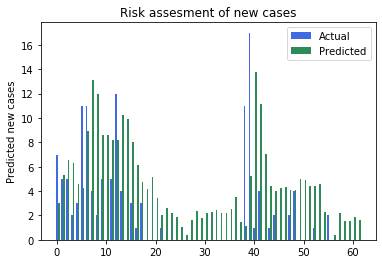

In [21]:
width = 0.35
ind = np.arange((len(y_pred)))
fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind,y_test, width, color='royalblue')
rects2 = ax.bar(ind+width, y_pred, width, color='seagreen')
ax.set_ylabel('Predicted new cases')
ax.set_title('Risk assesment of new cases')

ax.legend( (rects1[0], rects2[0]), ('Actual', 'Predicted') )

plt.show()

Text(0.5, 1.0, 'Actual cases')

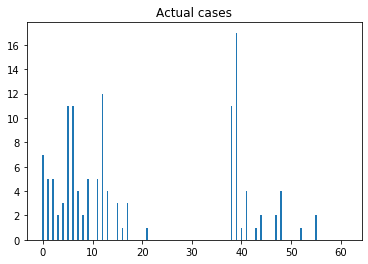

In [368]:
plt.bar(ind,y_test,width = 0.35)
plt.title('Actual new cases')

Text(0.5, 1.0, 'Predicted new cases')

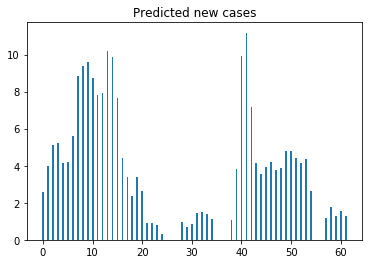

In [369]:
plt.bar(ind,y_pred,width = 0.35)
plt.title('Predicted new cases')